## **Data Cleaning and Visualizations**

In [1]:
#To filter the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the basic modules and libraries for data exploration and processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Reading the Data and Preprocessing

In [5]:
#mounting the drive to the colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading the excel data file from Drive
df = pd.read_excel('/content/drive/My Drive/flipkart_com-ecommerce_sample.xlsx')

In [5]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [7]:
#viewing to see if product specifications data and checking if we need it or not
specs = df['product_specifications'].tolist()
specs[0]

'{"product_specification"=>[{"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 3"}, {"key"=>"Fabric", "value"=>"Cotton Lycra"}, {"key"=>"Type", "value"=>"Cycling Shorts"}, {"key"=>"Pattern", "value"=>"Solid"}, {"key"=>"Ideal For", "value"=>"Women\'s"}, {"value"=>"Gentle Machine Wash in Lukewarm Water, Do Not Bleach"}, {"key"=>"Style Code", "value"=>"ALTHT_3P_21"}, {"value"=>"3 shorts"}]}'

In [8]:
#viewing how long the product tree is
tree = df['product_category_tree'].tolist()
tree[10]

'["Footwear >> Women\'s Footwear >> Ballerinas >> Ladela Bellies"]'

### 2. Data Exploration & Cleaning

In [9]:
#checking if NaN values are present or not
df.isnull().any()

uniq_id                    False
crawl_timestamp            False
product_url                False
product_name               False
product_category_tree      False
pid                        False
retail_price                True
discounted_price            True
image                       True
is_FK_Advantage_product    False
description                 True
product_rating             False
overall_rating             False
brand                       True
product_specifications      True
dtype: bool

In [10]:
#checking for the number of NaN values
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [11]:
#since there are only 2 NaN values in the desciption column, we can drop the 2 rows without major loss of data
newdf = df.dropna(subset=['description'])

In [12]:
#checking if the NaN values are successfully dropped
newdf.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   0
product_rating                0
overall_rating                0
brand                      5863
product_specifications       14
dtype: int64

In [13]:
#Since we need to predict the category of the product, we need description as our main feature and category tree to train to the model
maindf = newdf[['product_name','product_category_tree','description']]
maindf.head()

,product_name,product_category_tree,description
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...


In [14]:
#stripping the data of the [] and " "
maindf['product_category_tree'] = maindf['product_category_tree'].apply(lambda x: x.strip("[]\""))
maindf.head()

,product_name,product_category_tree,description
0,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",Key Features of Alisha Solid Women's Cycling S...
1,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,Key Features of AW Bellies Sandals Wedges Heel...
3,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",Key Features of Alisha Solid Women's Cycling S...
4,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,Specifications of Sicons All Purpose Arnica Do...


In [15]:
#getting the primary category
maindf['category'] = maindf['product_category_tree'].apply(lambda x: x.split('>>')[0])


In [16]:
#exploring the different categories and counts to check for irrelevant categories 
countdf = maindf['category'].value_counts()
countdf.reset_index().head()

,index,category
0,Clothing,6197
1,Jewellery,3531
2,Footwear,1227
3,Mobiles & Accessories,1099
4,Automotive,1012


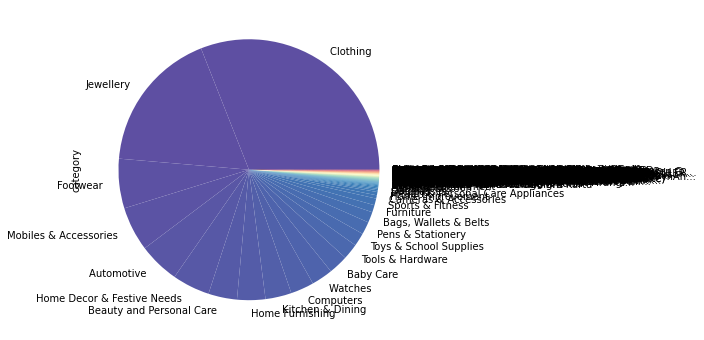

In [17]:
#plotting a pie chart to see the distribution
countdf.plot(kind='pie', colormap='Spectral_r', figsize=(6, 6))

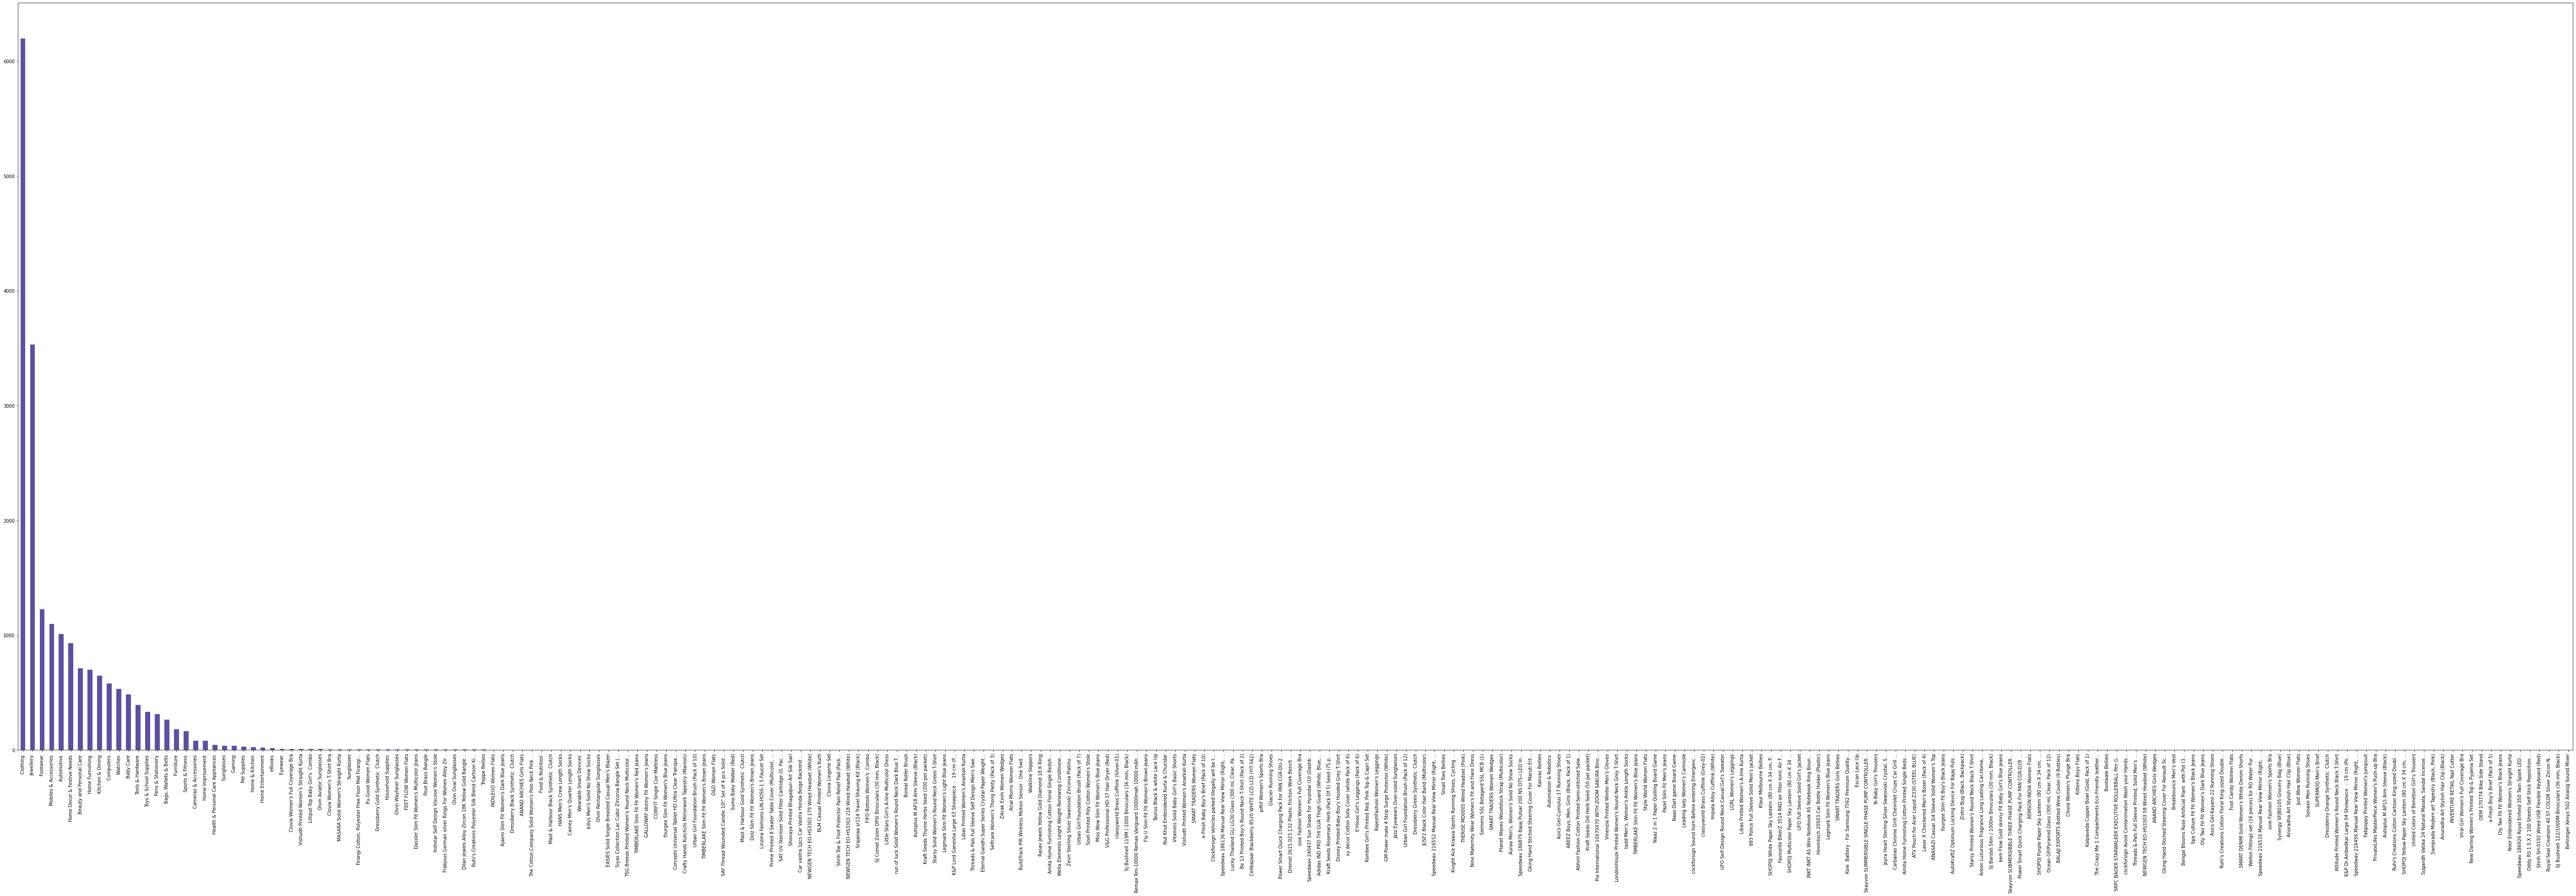

In [18]:
#plotting a bar graph to get a better view
countdf.plot(kind='bar', colormap='Spectral_r', figsize=(100, 30))

In [19]:
#since we found out that there are many irrelevant primary categories with size less than 10, we are creating a list with all the relevant categories 
countdf = countdf.reset_index()
lessdf = countdf.loc[countdf['category']>=10]
l = lessdf['index'].tolist()
l

['Clothing ',
 'Jewellery ',
 'Footwear ',
 'Mobiles & Accessories ',
 'Automotive ',
 'Home Decor & Festive Needs ',
 'Beauty and Personal Care ',
 'Home Furnishing ',
 'Kitchen & Dining ',
 'Computers ',
 'Watches ',
 'Baby Care ',
 'Tools & Hardware ',
 'Toys & School Supplies ',
 'Pens & Stationery ',
 'Bags, Wallets & Belts ',
 'Furniture ',
 'Sports & Fitness ',
 'Cameras & Accessories ',
 'Home Improvement ',
 'Health & Personal Care Appliances ',
 'Sunglasses ',
 'Gaming ',
 'Pet Supplies ',
 'Home & Kitchen ',
 'Home Entertainment ',
 'eBooks ',
 'Eyewear ']

In [20]:
#we are assigning all the irrelavant primary categories as the "Others" category 
maindf['category'] = maindf['category'].apply(lambda x: "Others" if x not in l else x)
maindf.category.value_counts()

Clothing                              6197
Jewellery                             3531
Footwear                              1227
Mobiles & Accessories                 1099
Automotive                            1012
Home Decor & Festive Needs             929
Beauty and Personal Care               710
Home Furnishing                        699
Kitchen & Dining                       647
Computers                              578
Watches                                530
Baby Care                              483
Tools & Hardware                       391
Others                                 337
Toys & School Supplies                 330
Pens & Stationery                      313
Bags, Wallets & Belts                  265
Furniture                              180
Sports & Fitness                       166
Cameras & Accessories                   82
Home Improvement                        81
Health & Personal Care Appliances       43
Sunglasses                              35
Gaming     

[Text(0, 0.5, 'Categories'), Text(0.5, 0, 'Count')]

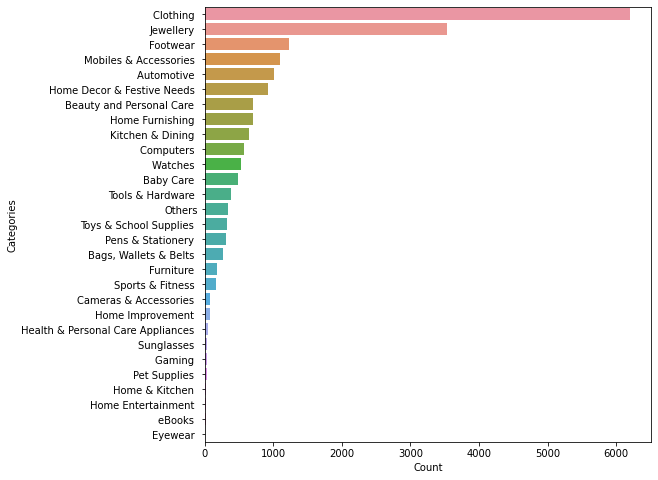

In [21]:
labels = maindf['category'].value_counts().index
val = maindf['category'].value_counts().values

plt.figure(figsize = (8,8))
ax = sns.barplot(val,labels)
ax.set(xlabel = 'Count',ylabel = 'Categories')

In [22]:
#since we have our primary category, we are dropping the product category tree for now
maindf.drop(['product_category_tree'],axis=1,inplace=True)
maindf.head()

,product_name,description,category
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,Pet Supplies


### 3. Removing Noise

In [23]:
import sklearn.model_selection
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
#The casing of product titles is clearly all over the place. It will help us reduce the vocabulary size to lowercase them all.
maindf['description'] = maindf['description'].str.lower()
maindf.head()

,product_name,description,category
0,Alisha Solid Women's Cycling Shorts,key features of alisha solid women's cycling s...,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,fabhomedecor fabric double sofa bed (finish co...,Furniture
2,AW Bellies,key features of aw bellies sandals wedges heel...,Footwear
3,Alisha Solid Women's Cycling Shorts,key features of alisha solid women's cycling s...,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,specifications of sicons all purpose arnica do...,Pet Supplies


In [25]:
maindf['product_name'] = maindf['product_name'].str.lower()
maindf.head()

,product_name,description,category
0,alisha solid women's cycling shorts,key features of alisha solid women's cycling s...,Clothing
1,fabhomedecor fabric double sofa bed,fabhomedecor fabric double sofa bed (finish co...,Furniture
2,aw bellies,key features of aw bellies sandals wedges heel...,Footwear
3,alisha solid women's cycling shorts,key features of alisha solid women's cycling s...,Clothing
4,sicons all purpose arnica dog shampoo,specifications of sicons all purpose arnica do...,Pet Supplies


In [26]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#fucntion to remove stop words
def remove_stopwords(text):
    textArr = text.split(' ')
    textArr=list(set(textArr))
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

#remove stopwords from text
maindf['description'] = maindf['description'].apply(remove_stopwords)
maindf.head()

,product_name,description,category
0,alisha solid women's cycling shorts,"fabric women's additional wash 3 gentle red, k...",Clothing
1,fabhomedecor fabric double sofa bed,depth save (finish simple applying bru...view ...,Furniture
2,aw bellies,rs. casual contents days ideal general manufac...,Footwear
3,alisha solid women's cycling shorts,fabric women's additional wash altght_11 gentl...,Clothing
4,sicons all purpose arnica dog shampoo,sicons (500 ml 500 specifications number ml) s...,Pet Supplies


In [27]:
import string
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

maindf['description'] = maindf['description'].apply(clean_text)
maindf.head()

,product_name,description,category
0,alisha solid women's cycling shorts,fabric womens additional wash gentle code numb...,Clothing
1,fabhomedecor fabric double sofa bed,depth save finish simple applying bruview flip...,Furniture
2,aw bellies,casual contents days ideal general manufacture...,Footwear
3,alisha solid women's cycling shorts,fabric womens additional wash altght11 gentle ...,Clothing
4,sicons all purpose arnica dog shampoo,sicons specifications number sales fashion qua...,Pet Supplies


In [28]:
maindf['category'] = maindf['category'].str.lower()
maindf.head()

,product_name,description,category
0,alisha solid women's cycling shorts,fabric womens additional wash gentle code numb...,clothing
1,fabhomedecor fabric double sofa bed,depth save finish simple applying bruview flip...,furniture
2,aw bellies,casual contents days ideal general manufacture...,footwear
3,alisha solid women's cycling shorts,fabric womens additional wash altght11 gentle ...,clothing
4,sicons all purpose arnica dog shampoo,sicons specifications number sales fashion qua...,pet supplies


In [29]:
!pip install spacy 

In [30]:
import spacy
nlp = spacy.load('en',disable=['parser','ner'])

def lemmatization(texts,allowed_postags=['NOUN']):
    output = []
    for sent in texts:
        doc = nlp(sent)
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output

In [31]:
desc_list = maindf['description'].tolist()
print(desc_list[0])

fabric womens additional wash gentle code number features cotton solid contents lycra sales pack care lukewarm cycling alisha navy type machine pattern water ideal general bleach style details package shorts navyspecifications altht3p21


In [32]:
cat_list = maindf['category'].tolist()
cat_list[0]

'clothing '

In [33]:
maindf['category'] = maindf['category'].apply(lambda x:x.rstrip(" "))
maindf.head()

,product_name,description,category
0,alisha solid women's cycling shorts,fabric womens additional wash gentle code numb...,clothing
1,fabhomedecor fabric double sofa bed,depth save finish simple applying bruview flip...,furniture
2,aw bellies,casual contents days ideal general manufacture...,footwear
3,alisha solid women's cycling shorts,fabric womens additional wash altght11 gentle ...,clothing
4,sicons all purpose arnica dog shampoo,sicons specifications number sales fashion qua...,pet supplies


In [38]:
maindf.to_csv('flipkart_data_cleaned.csv',index=False)
!cp flipkart_data_cleaned.csv "drive/My Drive/"

In [7]:
df=pd.read_csv('/content/drive/My Drive/flipkart_data_cleaned.csv')

In [8]:
df.head()

,product_name,description,category
0,alisha solid women's cycling shorts,fabric womens additional wash gentle code numb...,clothing
1,fabhomedecor fabric double sofa bed,depth save finish simple applying bruview flip...,furniture
2,aw bellies,casual contents days ideal general manufacture...,footwear
3,alisha solid women's cycling shorts,fabric womens additional wash altght11 gentle ...,clothing
4,sicons all purpose arnica dog shampoo,sicons specifications number sales fashion qua...,pet supplies


In [9]:
df1 = df.copy()
df1['length'] = df['description'].apply(lambda x: len(x))
df1.head()

,product_name,description,category,length
0,alisha solid women's cycling shorts,fabric womens additional wash gentle code numb...,clothing,236
1,fabhomedecor fabric double sofa bed,depth save finish simple applying bruview flip...,furniture,1935
2,aw bellies,casual contents days ideal general manufacture...,footwear,431
3,alisha solid women's cycling shorts,fabric womens additional wash altght11 gentle ...,clothing,235
4,sicons all purpose arnica dog shampoo,sicons specifications number sales fashion qua...,pet supplies,143


In [11]:
grp = df1.groupby(['category'])['length'].mean().reset_index()

In [13]:
grp.head()

,category,length
0,automotive,251.991107
1,baby care,228.861284
2,"bags, wallets & belts",301.498113
3,beauty and personal care,184.767606
4,cameras & accessories,171.036585


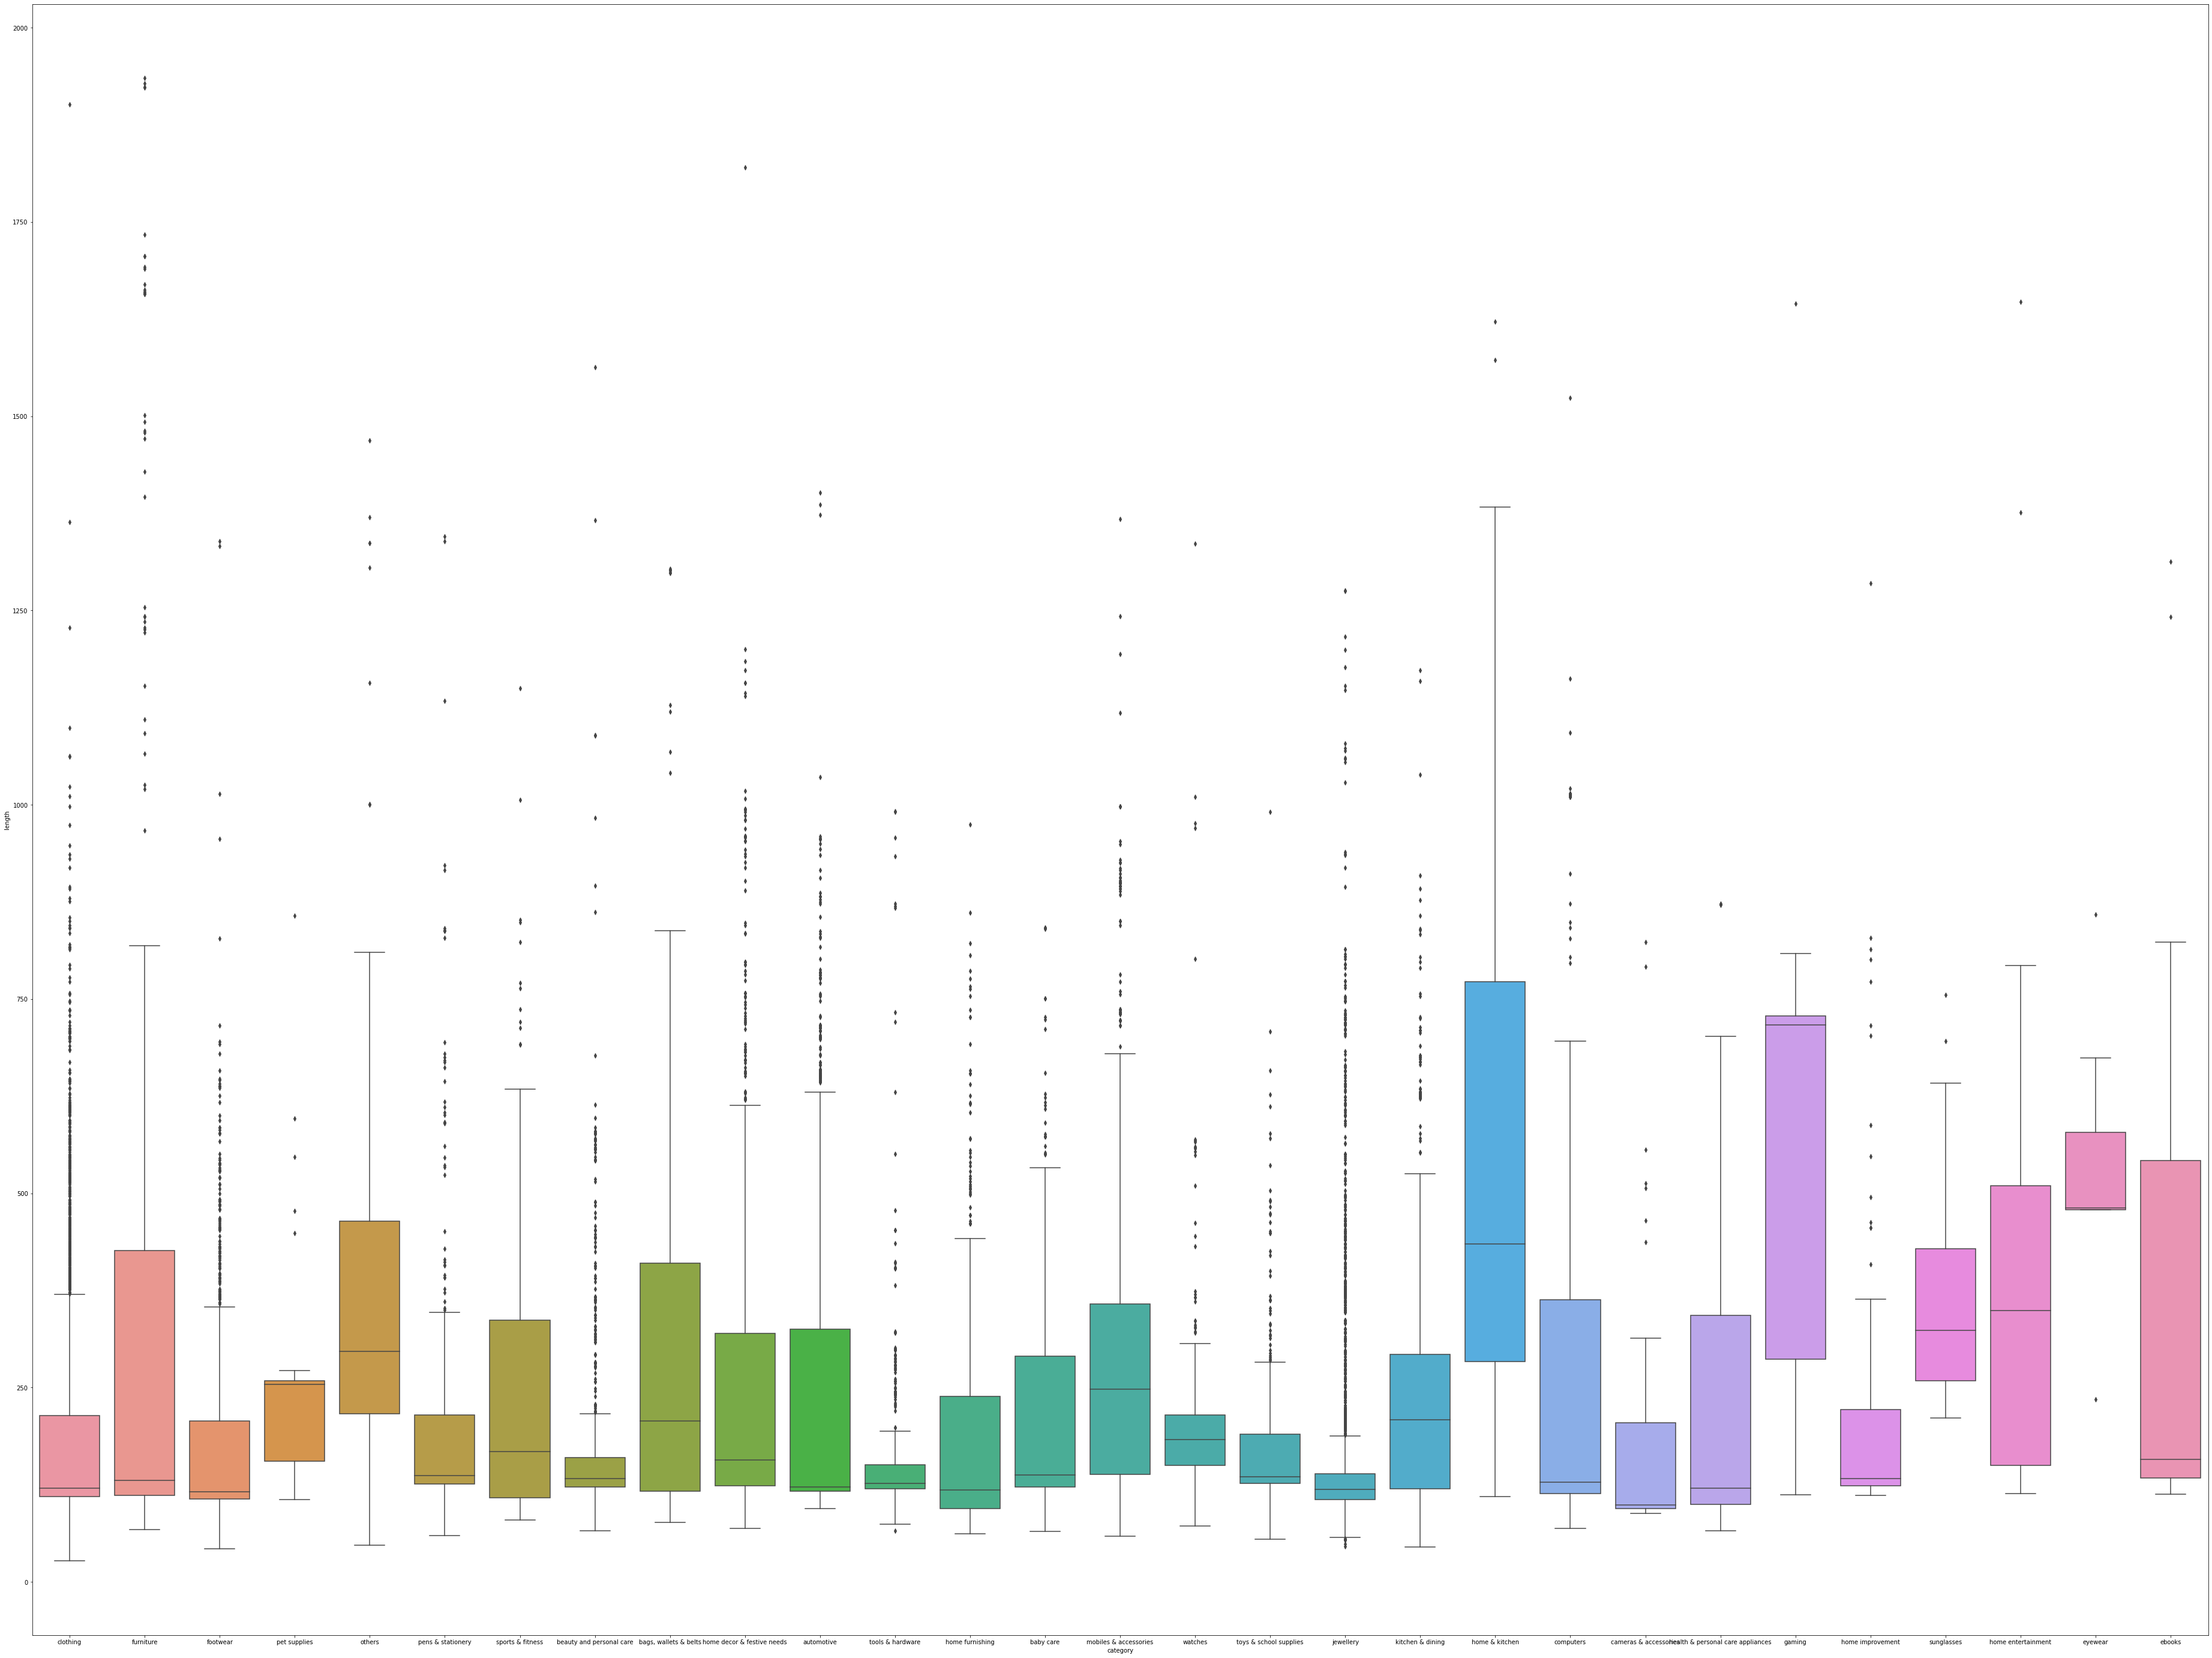

In [30]:
ax = plt.figure(figsize = (65,50))
sns.boxplot(x = "category", y = "length", data = df1 )

Box plot to visualise description length and the variation from the mean

In [31]:
 plt.savefig('lengthboxplot.png')

<Figure size 432x288 with 0 Axes>

In [40]:
pip freeze > requirements.txt